Nama : Al Hadi Busra \\
Username : alhadi78 \\
Email Akun Dicoding : alhadibusra1002@gmail.com

# Import Library

In [ ]:
!pip install lazypredict
import lazypredict

In [ ]:
# 1. Manipulasi Data
import pandas as pd
import numpy as np

# 2. Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # Visualisasi missing value

# 3. Preprocessing / Penyiapan Data
from sklearn.preprocessing import scale, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import LocalOutlierFactor

# 4. Model Selection / Evaluasi Model
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# 5. Model Klasifikasi

# Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Tree-Based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Boosting Libraries
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

# 6. Model Otomatis
from lazypredict.Supervised import LazyClassifier

# 9. Eksternal / API / Kaggle
import kagglehub

# Data Understanding

### Mengambil Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
# Membaca file CSV dataset diabetes dari direktori lokal di Kaggle
link = "/kaggle/input/pima-indians-diabetes-database/diabetes.csv"
df = pd.read_csv(link)

In [ ]:
# Menampilkan 5 baris pertama dari dataset untuk melihat struktur data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Informasi Dataset

In [ ]:
# Ukuran dataset diperiksa. Dataset terdiri dari 768 unit observasi dan 9 variabel.
df.shape

(768, 9)

In [ ]:
# Menampilkan informasi tentang fitur/kolom dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari tebel diatas dapat dilihat bahwa dataset memiliki 8 kolom dengan tipe number baik int maupun float

In [ ]:
# Mengecek jumlah nilai yang hilang di setiap kolom dalam dataset
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Dari tabel diatas dapat dilihat bahwa tidak terdapat missing value pada dataset. Namun setelah dilakukan pemahaman lebih mendalam dari data terhadap nilai nilai yang ada pada data, ditemukan bahwa terdapat nilai yang janggal pada beberapa fitur. Hal ini dapat dilihat pada tabel statistik deskriptif pada dataset dibawah

In [ ]:
# Mengakses statistik deskriptif dataset pada beberapa persentil, lalu ditransposisikan untuk tampilan yang lebih rapi.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


Hal ini dapat dilihat pada tabel diatas bahwa nilai minimal untuk variable Glucose, BloodPressure, Insulin, SkinThickness, Indeks massa tubuh adalah 0. Tentunya ini bukan merupakan nilai yang logis dikarenakan manusia hidup tidak akan memiliki nilai 0 pada variable variable tersebut. Ini merupakan indikasi yang menandakan adanya missing value pada variable variable tersebut. Untuk mengatasi hal tersebut, kita akan mengganti nilai 0 pada variable variable tersebut ke NaN dan dilakukkan pengecekan ulang berapa missing value yang ada pada setiap variable

### Distribusi Masing Masing Niai variabel Outcome

In [ ]:
# Menghitung persentase distribusi dari variabel Outcome dalam dataset.
df["Outcome"].value_counts() * 100 / len(df)

,count
Outcome,
0,65.10
1,34.90


In [ ]:
# Menghitung jumlah masing-masing kelas pada variabel Outcome.
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


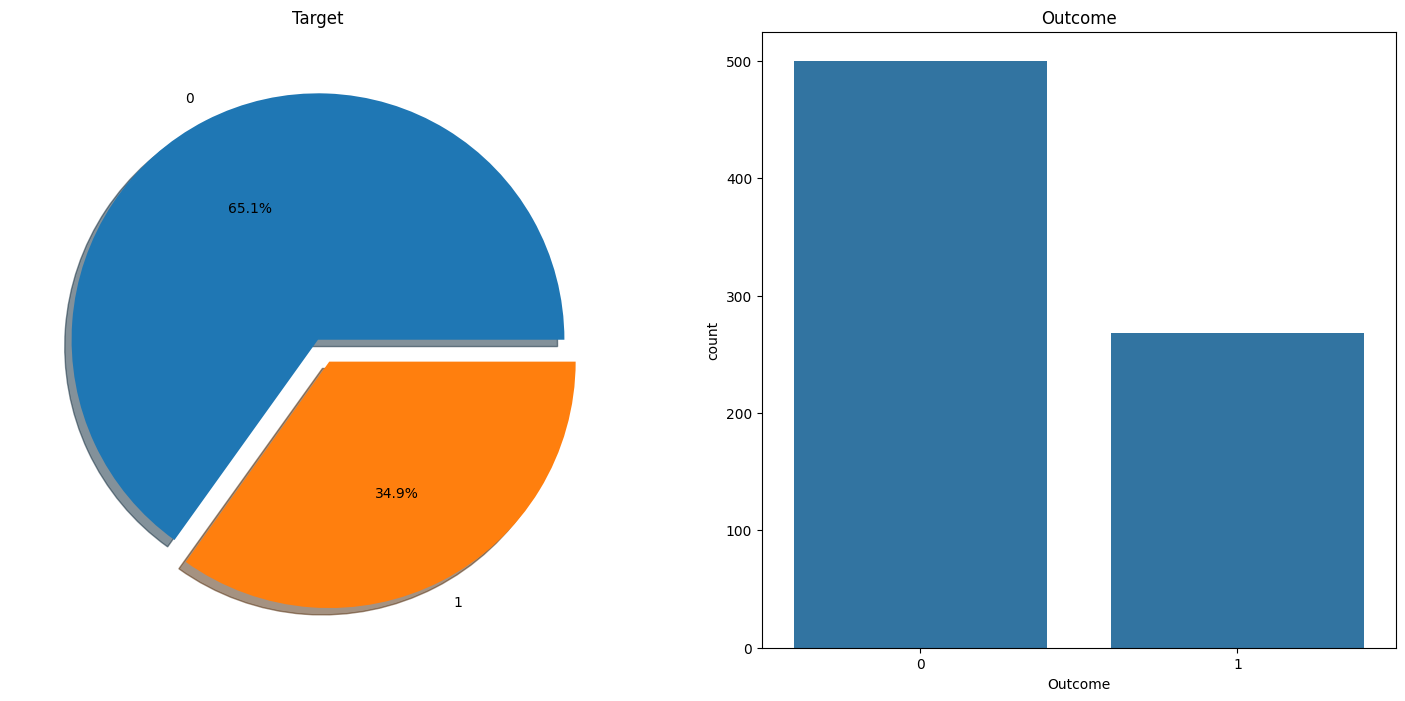

In [ ]:
# Distribusi variabel Outcome dalam data diperiksa dan divisualisasikan.
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Visualisasi distribusi Outcome dalam bentuk pie chart
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],         # Meledakkan slice kedua (biasanya kelas minoritas)
    autopct='%1.1f%%',        # Menampilkan persentase
    ax=ax[0],
    shadow=True               # Menambahkan bayangan
)
ax[0].set_title('Target')     # Judul untuk pie chart
ax[0].set_ylabel('')          # Menghapus label sumbu Y

# Visualisasi distribusi Outcome dalam bentuk count plot
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')    # Judul untuk count plot

plt.show()

Pada gambar di atas, terlihat bahwa dataset memiliki distribusi data yang tidak seimbang pada setiap nilai target. Kondisi ini dapat menyebabkan model lebih banyak belajar pada data yang dominan, yang pada akhirnya dapat mempengaruhi performa model. Untuk mengatasi masalah ini, perlu dilakukan penyeimbangan data dengan menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique)

## Visualisasi Distribusi Data

### Histogram Variabel Age

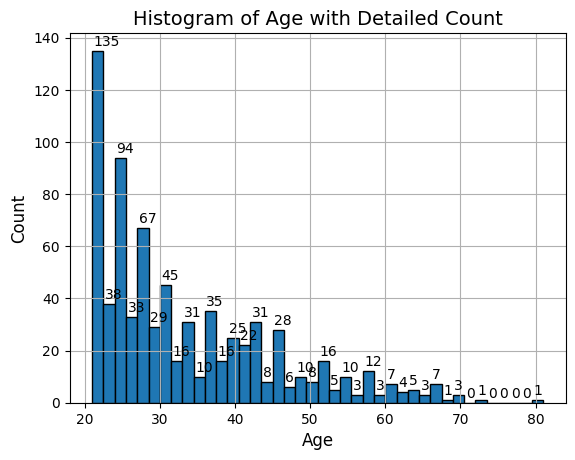

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["Age"], bins=40, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(40):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of Age with Detailed Count', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Pada fitur Age, dapat dilihat bahwa beberapa data terpusat diumur 20 tahunan. Sebagin kecil data ada juga yang tersebar ke nilai 60 keatas.

### Histogram Variabel BMI

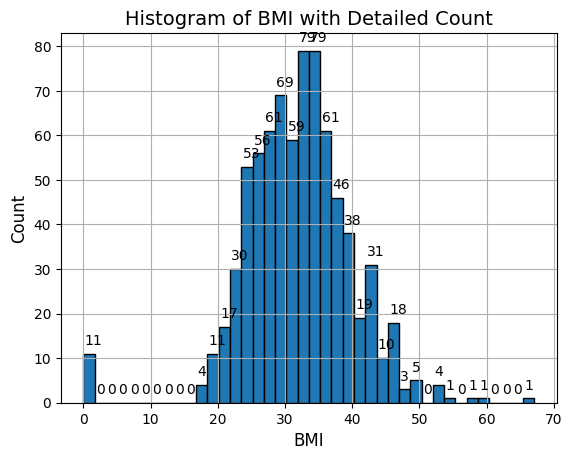

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["BMI"], bins=40, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(40):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of BMI with Detailed Count', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Pada fitur BMI, sebagian data terpusat diantarra rentang 25 -40. Sebagian kecil data lainnya tersebat diluar rentang nilai tersebut.

### Histogram Variabel SkinThickness

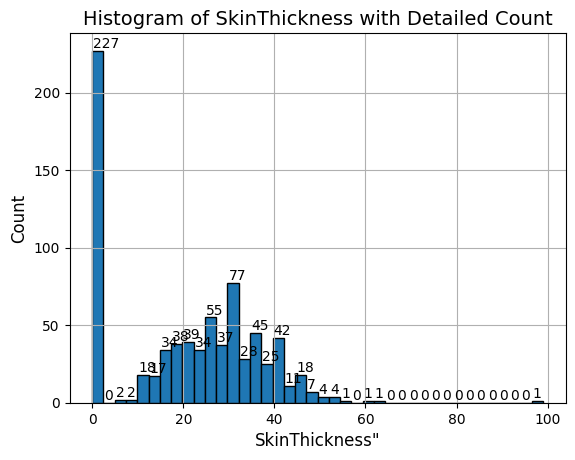

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["SkinThickness"], bins=40, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(40):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of SkinThickness with Detailed Count', fontsize=14)
plt.xlabel('SkinThickness"', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Pada fitur SkinThickness, banyak data memiliki nilai dibawah 5, dan yang lainnya kebanyakan tersebar diantara nilai 20- 40.

### Histogram Variabel BloodPressure

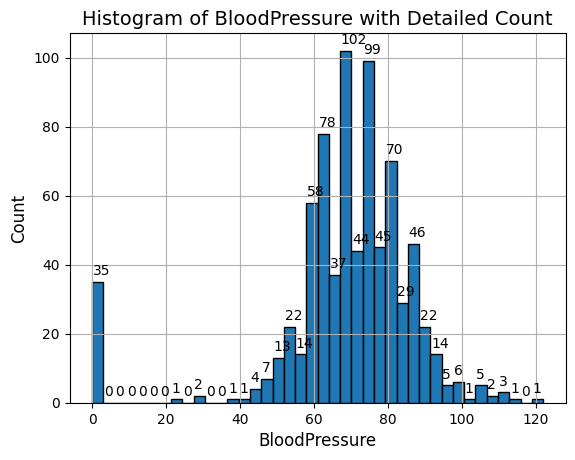

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["BloodPressure"], bins=40, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(40):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of BloodPressure with Detailed Count', fontsize=14)
plt.xlabel('BloodPressure', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Pada fitur BloodPressure. pada fitur ini, nilai data didominasi antara 60 -90, namun dapat diamati bahwa terdapat data yang jumlahnya cukup banyak pada rentang nilai 5 kebawah.

### Histogram Variabel Insulin

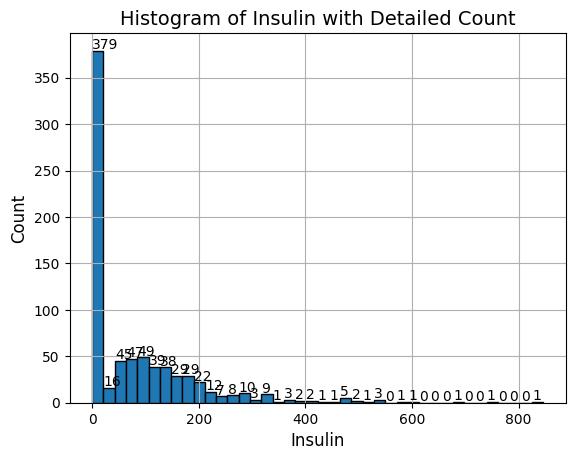

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["Insulin"], bins=40, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(40):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of Insulin with Detailed Count', fontsize=14)
plt.xlabel('Insulin', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Untuk fiur Insulin, kebanyak data tersebar berada pada rentang nilai kurang dari 200 Terutama pada rentang nilai yang mendekati 0.

### Histogram Variabel Glucose

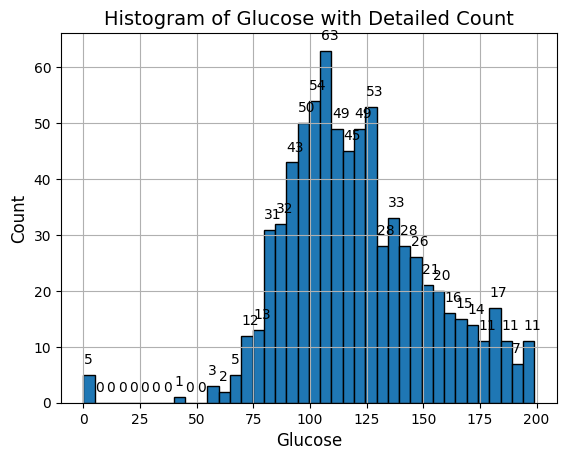

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["Glucose"], bins=40, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(40):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of Glucose with Detailed Count', fontsize=14)
plt.xlabel('Glucose', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Untuk fitur Glucose, data tersebar diantara nilai 75-200. Namun paling banyak terpusat diantara nilai 100 -125. Terdapat sebagian kecil data yang berada di bawah nilai 75.

### Histogram Variabel DiabetesPedigreeFunction

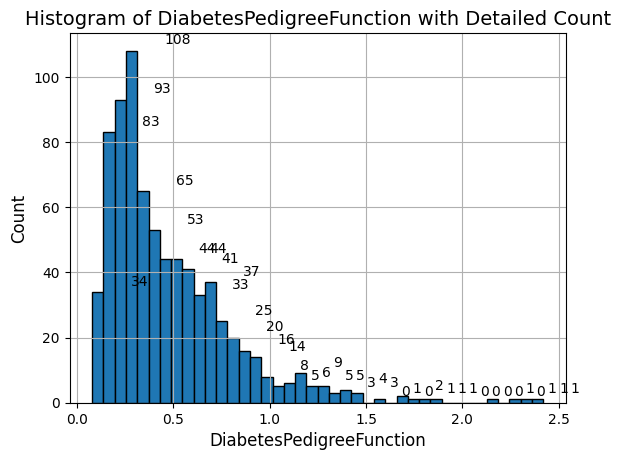

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["DiabetesPedigreeFunction"], bins=40, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(40):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of DiabetesPedigreeFunction with Detailed Count', fontsize=14)
plt.xlabel('DiabetesPedigreeFunction', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Untuk fiur DiabetesPedigreeFunction, sebagain data tersebar pada nilai 0 - 1. Sebagian kecil lainnya berada diatas nilai 1.

### Histogram Variabel Pregnancies

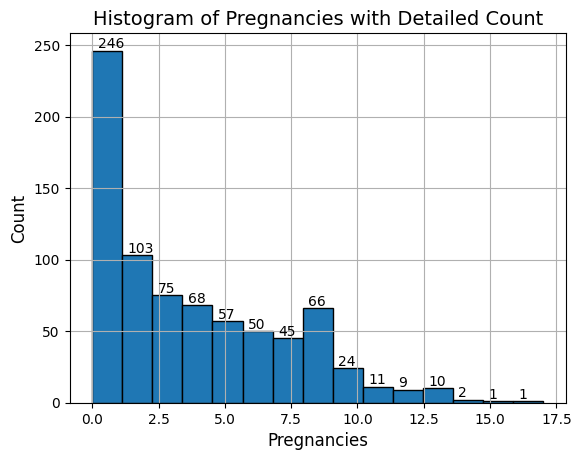

In [ ]:
# Membuat histogram
count, bins, patches = plt.hist(df["Pregnancies"], bins=15, edgecolor="black")

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True)

# Menambahkan label pada setiap bin (jumlah individu per bin)
for i in range(15):  # Jumlah bin yang digunakan adalah 40
    # Menambahkan label pada tiap bin
    plt.text(bins[i] + 0.2, count[i] + 2, str(int(count[i])), color="black", fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Histogram of Pregnancies with Detailed Count', fontsize=14)
plt.xlabel('Pregnancies', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.show()

Untuk fiur Pregnancies, kebanyakan data tersebar pada rentang nilai dibawah 5. Sebagian kecil data ada yang tersebahr diatas nilai 12.

### Histogram Keseluruhan Variabel

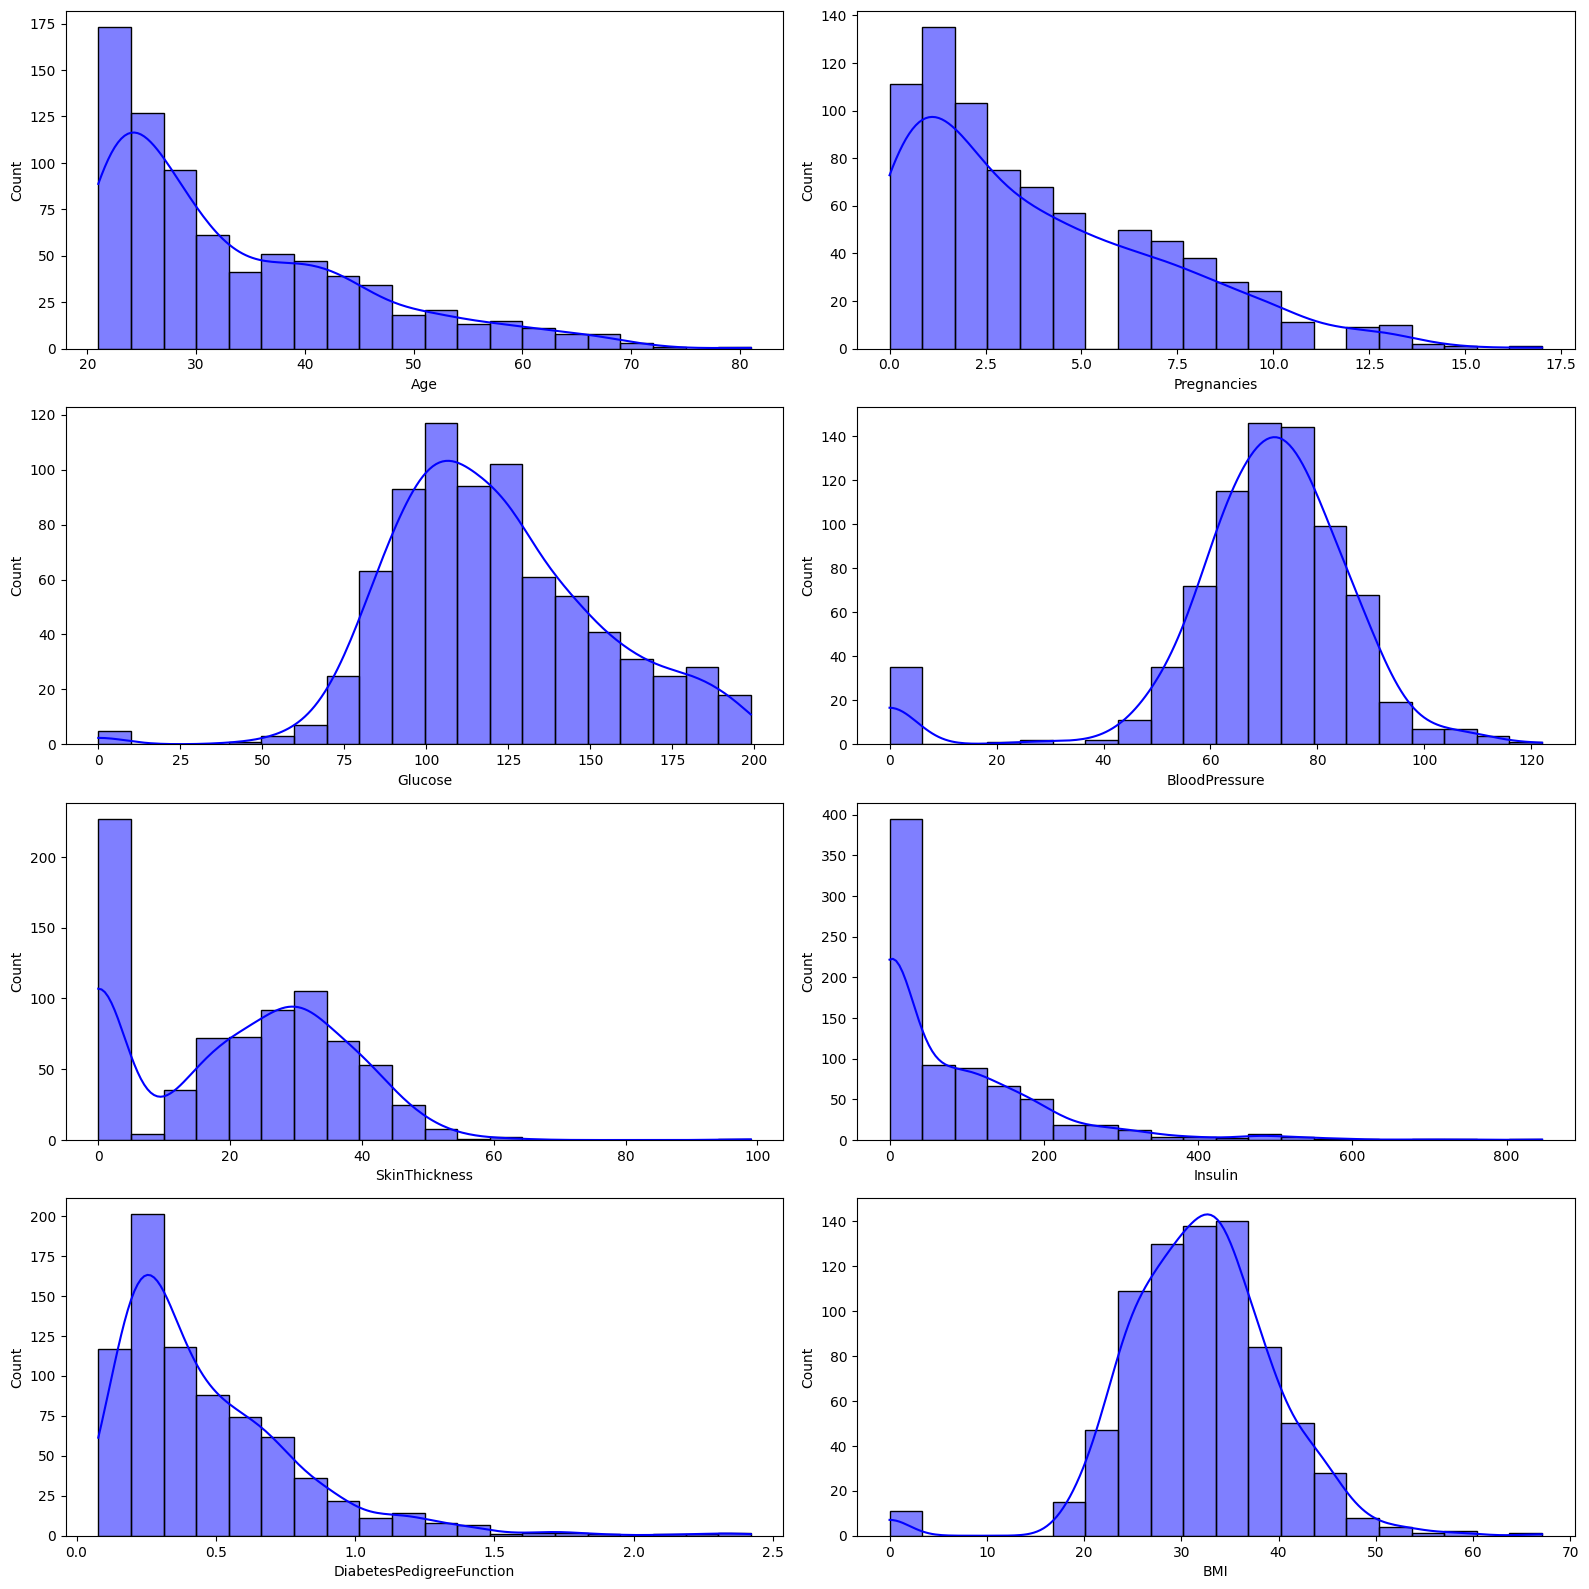

In [ ]:
# Membuat daftar kolom yang akan dianalisis
columns = ['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'DiabetesPedigreeFunction', 'BMI']

# Membuat plot
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Loop untuk membuat histogram dan density plot untuk setiap kolom
for i, col in enumerate(columns):
    row = i // 2  # Menentukan baris
    col_idx = i % 2  # Menentukan kolom
    sns.histplot(df[col], bins=20, kde=True, ax=ax[row, col_idx], color='blue')  # Histogram + density plot

# Menyesuaikan tampilan
plt.tight_layout()
plt.show()

Dari gambar dapat dilihat bahwa

* Pada fitur Age, dapat dilihat bahwa beberapa data terpusat diumur 20 tahunan. Sebagin kecil data ada juga yang tersebar ke nilai 60 keatas
* Pada fitur BMI, sebagian data terpusat diantarra rentang 25 -40. Sebagian kecil data lainnya tersebat diluar rentang nilai tersebut
* Pada fitur SkinThickness, banyak data memiliki nilai dibawah 5, dan yang lainnya kebanyakan tersebar diantara nilai 20- 40.
* Fitur selanjutnya yang dapat diamati adalah BloodPressure. pada fitur ini, nilai data didominasi antara 60 -90, namun dapat diamati bahwa terdapat data yang jumlahnya cukup banyak pada rentang nilai 5 kebawah.
* Untuk fiur insulin, kebanyak data tersebar bearada pada rentang nilai kurang dari 200 Terutama pada rentang nilai yang mendekati 0.
* Untuk fitur glucose, data tersebar diantara nilai 75-200. Namun paling banyak terpusat diantara nilai 100 -125. Terdapat sebagian kecil data yang berada di bawah nilai 75
* Untuk fiur DiabetesPedigreeFunction, sebagain data tersebar pada nilai 0 - 1. Sebagian kecil lainnya berada diatas nilai 1
* Untuk fiur Pregnancies, kebanyakan data tersebar pada rentang nilai dibawah 5.Sebagin kecil data ada yan tersebahr diatas nilai 12.

### Nilai rata masing-masing variabel terhadap masing masing nilai variabel Outcome

In [ ]:
# Mengelompokkan data berdasarkan nilai 'Outcome' dan menghitung rata-rata jumlah kehamilan (Pregnancies) untuk setiap kelompok
df.groupby("Outcome").agg({"Pregnancies": "mean"})

,Pregnancies
Outcome,
0,3.30
1,4.87


In [ ]:
# Mengelompokkan data berdasarkan nilai 'Outcome' dan menghitung rata-rata usia (Age) untuk setiap kelompok
df.groupby("Outcome").agg({"Age": "mean"})

,Age
Outcome,
0,31.19
1,37.07


In [ ]:
# Menampilkan rata-rata nilai insulin untuk masing-masing kelas pada variabel 'Outcome' (0 = tidak diabetes, 1 = diabetes).
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.79
1,100.34


In [ ]:
# Menampilkan rata-rata nilai glukosa untuk masing-masing kelas pada variabel 'Outcome' (0 = tidak diabetes, 1 = diabetes).
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.98
1,141.26


In [ ]:
# Menampilkan rata-rata nilai BMI untuk masing-masing kelas pada variabel 'Outcome' (0 = tidak diabetes, 1 = diabetes).
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.30
1,35.14


In [ ]:
# Menampilkan rata-rata nilai BloodPressure untuk masing-masing kelas pada variabel 'Outcome' (0 = tidak diabetes, 1 = diabetes).
df.groupby("Outcome").agg({"BloodPressure": "mean"})

,BloodPressure
Outcome,
0,68.18
1,70.82


In [ ]:
# Menampilkan rata-rata nilai DiabetesPedigreeFunction untuk masing-masing kelas pada variabel 'Outcome' (0 = tidak diabetes, 1 = diabetes).
df.groupby("Outcome").agg({"DiabetesPedigreeFunction": "mean"})

,DiabetesPedigreeFunction
Outcome,
0,0.43
1,0.55


In [ ]:
# Menampilkan rata-rata nilai SkinThickness untuk masing-masing kelas pada variabel 'Outcome' (0 = tidak diabetes, 1 = diabetes).
df.groupby("Outcome").agg({"SkinThickness": "mean"})

,SkinThickness
Outcome,
0,19.66
1,22.16


### Korelasi Dataset

In [ ]:
# Melihat korelasi antar variabel
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Ketika korelasi diperiksa, ada 1 variabel yang menunjukkan korelasi positif terhadap variabel target.
Variabel tersebut adalah Glucose. Ketika nilai Glucose meningkat, nilai variabel Outcome juga meningkat.

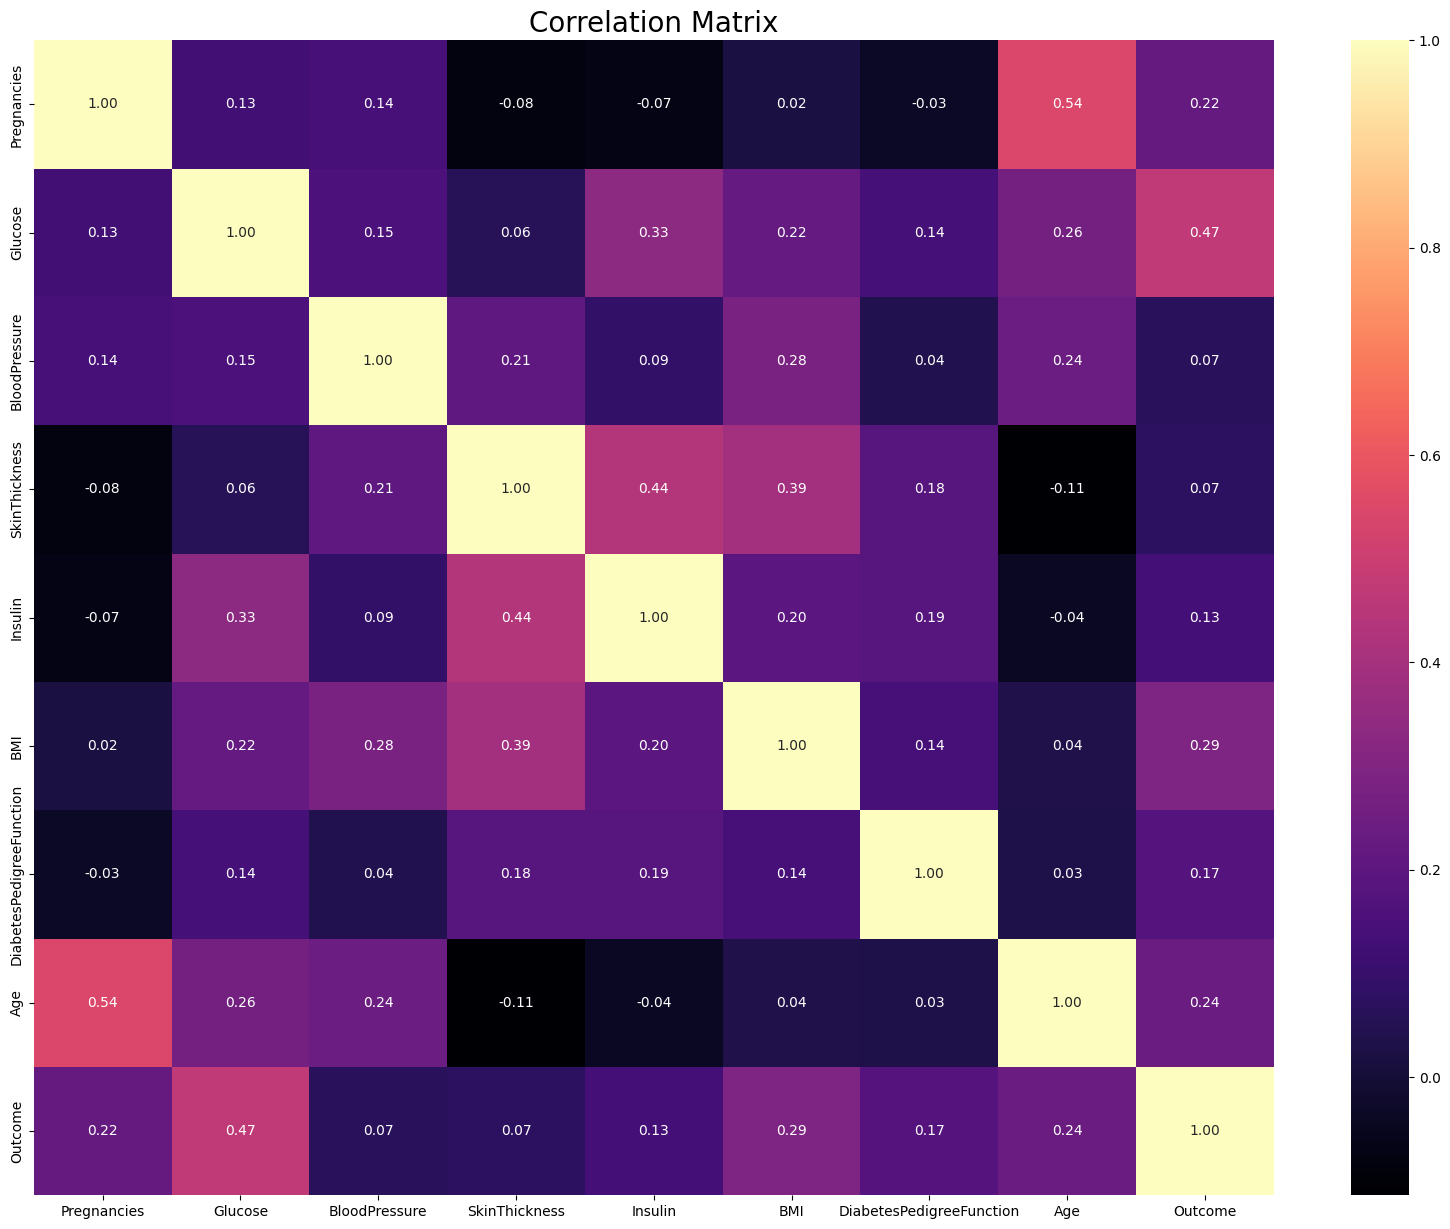

In [ ]:
# Menampilkan grafik matriks korelasi untuk seluruh variabel dalam dataset.
# Warna menunjukkan kekuatan korelasi antar fitur.
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

#  Data Preparation

### Penganan Missing Value

kita akan mengganti nilai 0 pada variable variable Glucose, BloodPressure, Insulin, SkinThickness,dan Indeks massa tubuh tersebut ke NaN dikarenakan nusia hidup tidak akan memiliki nilai 0 pada variable variable tersebut.

In [ ]:
# Mengganti nilai 0 dengan NaN (kosong) pada kolom: Age, Glucose, BloodPressure, SkinThickness, Insulin, dan BMI.
# Karena nilai 0 pada fitur-fitur tersebut dianggap tidak valid atau tidak logis secara medis (misalnya tekanan darah atau kadar glukosa tidak mungkin 0).

df[['Age', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Age', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,NaN,33.60,0.63,50,1
1,1,85.00,66.00,29.00,NaN,26.60,0.35,31,0
2,8,183.00,64.00,NaN,NaN,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [ ]:
# Mengecek jumlah nilai yang hilang di setiap kolom dalam dataset
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Setelah dilakukan penggantian nilai 0 pada beberapa variabel, dapat kita lihat bahwa terdapat missing value dengan jumlah yang tinggi pada beberapa variable. Untuk mengatasi hal tersebut, kita akan mengganti nilai missing value ini dengan nilai median masing masing variable yang missing value

<Axes: >

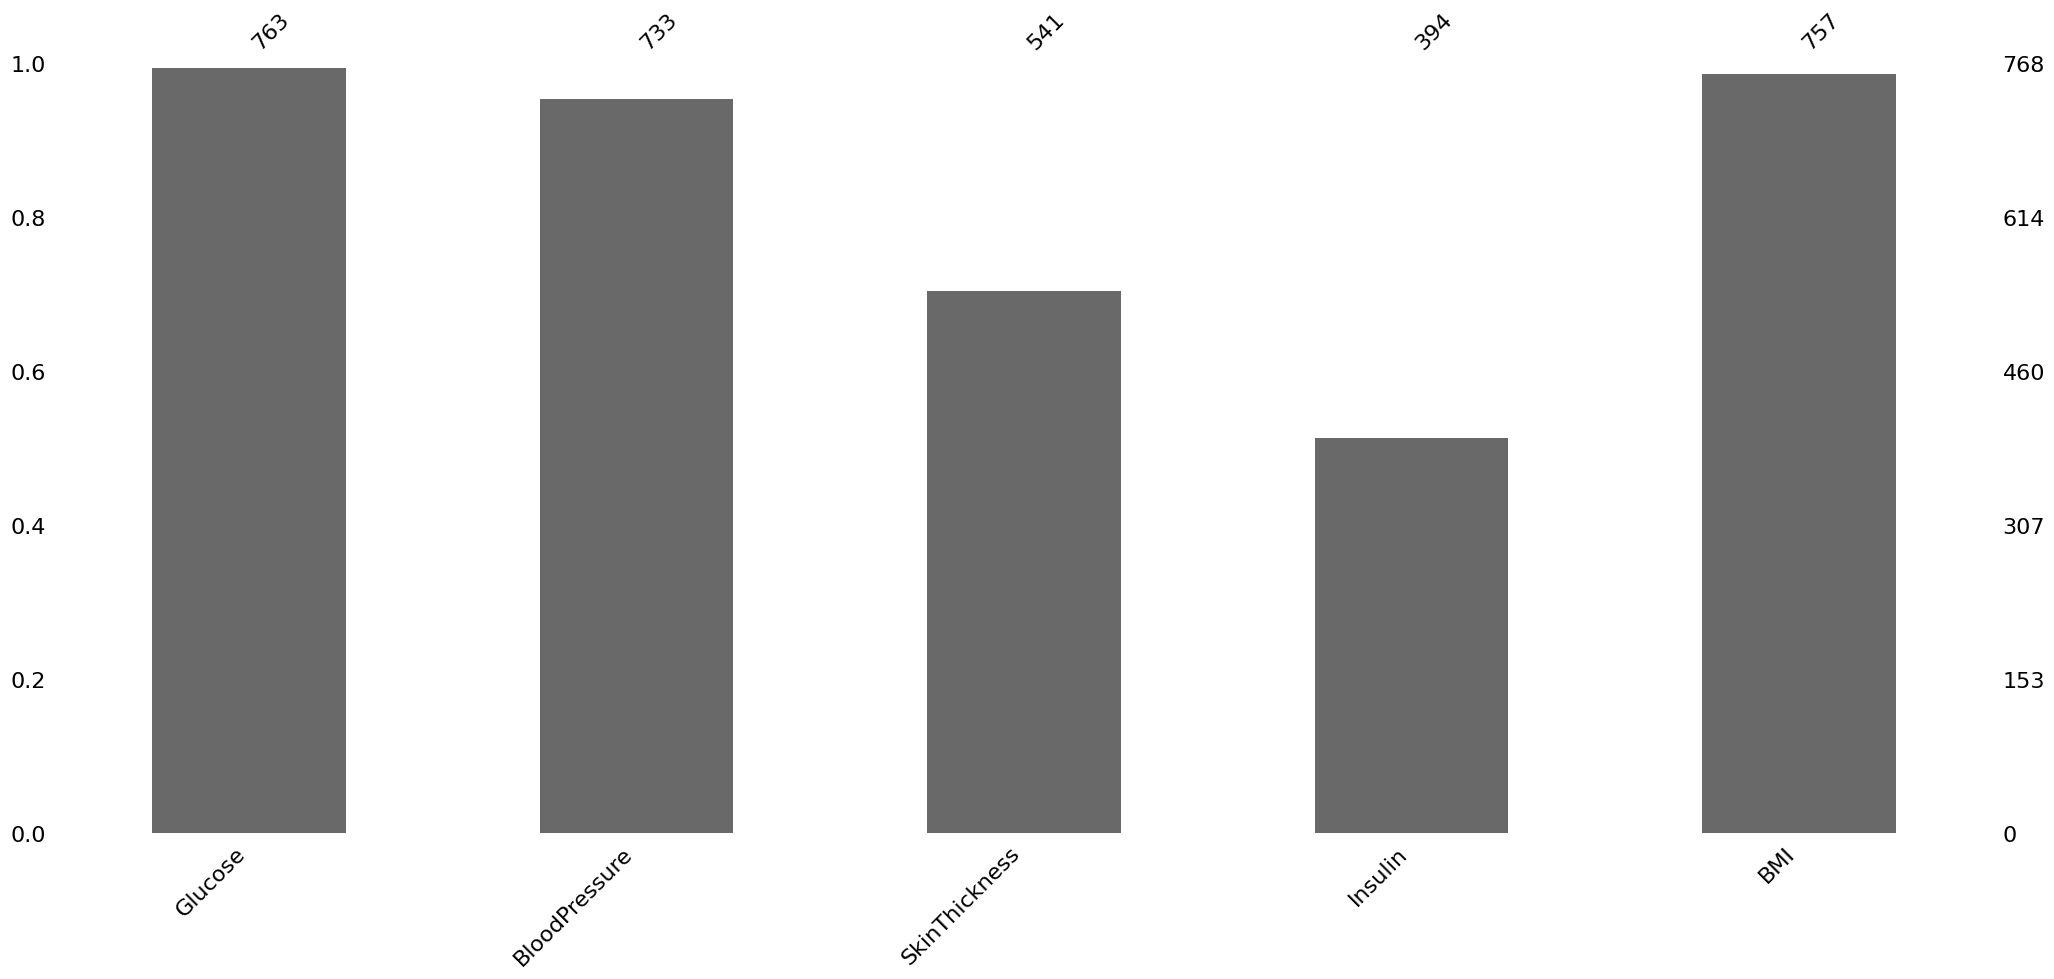

In [ ]:
# Menampilkan hanya kolom dengan missing values
df_missing = df.loc[:, df.isnull().any()]
msno.bar(df_missing)

Mengganti missing value dengan median pada setiap variabel bertujuan untuk mencegah distorsi yang mungkin terjadi jika menggunakan rata-rata, yang sangat dipengaruhi oleh outlier. Median lebih stabil terhadap nilai ekstrem, serta membantu menjaga keseimbangan data dan mengurangi potensi overfitting atau bias yang dapat muncul jika missing value diganti dengan nilai yang tidak representatif. Oleh karena itu, mengganti missing value dengan median adalah metode yang lebih efektif dan dapat diandalkan dalam mempersiapkan data untuk model machine learning.

In [ ]:
# Fungsi untuk menghitung median berdasarkan Outcome untuk setiap kolom
def get_median_values():
    median_dict = {}
    for var in df.columns.drop("Outcome"):
        median_values = df.groupby('Outcome')[var].median()
        median_dict[var] = median_values
    return median_dict

# Mengambil median untuk setiap kolom berdasarkan Outcome
median_values_dict = get_median_values()

# Mengisi missing values dengan median berdasarkan Outcome
for var in df.columns.drop("Outcome"):
    df.loc[(df['Outcome'] == 0) & (df[var].isnull()), var] = median_values_dict[var][0]
    df.loc[(df['Outcome'] == 1) & (df[var].isnull()), var] = median_values_dict[var][1]


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [ ]:
# Mengecek kembali jumlah nilai yang hilang setelah proses imputasi.
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Memeriksa Outlier pada Data

Outlier dapat memengaruhi hasil pelatihan model machine learning, sehingga penting untuk mengidentifikasinya secara akurat. Salah satu metode yang dapat digunakan untuk mendeteksi dan menangani outlier adalah Local Outlier Factor (LOF).

LOF adalah teknik dalam machine learning yang digunakan untuk mendeteksi anomali atau data yang berbeda secara signifikan dari mayoritas. Metode ini mengukur tingkat "keanehan" suatu data berdasarkan kepadatan lingkungannya. Jika sebuah data berada di area dengan kepadatan yang jauh lebih rendah dibandingkan tetangga-tetangganya, maka data tersebut dianggap sebagai outlier. LOF menghitung skor untuk setiap titik data—semakin tinggi skornya, semakin besar kemungkinan data tersebut adalah outlier.

LOF sangat cocok digunakan pada dataset multivariat karena mampu mempertimbangkan hubungan kompleks antar variabel. Oleh karena itu, metode ini relevan untuk diterapkan pada dataset PIMA Diabetes, yang terdiri dari berbagai variabel yang saling berinteraksi, seperti kadar glukosa, tekanan darah, dan berat badan. Sebagai contoh, kelebihan berat badan dapat memicu resistensi insulin, yang selanjutnya meningkatkan kadar glukosa darah dan berpotensi berhubungan dengan tekanan darah tinggi. Kombinasi interaksi ini membuat LOF menjadi metode yang efektif dalam mendeteksi data yang tidak wajar pada dataset ini. Berikut tabel data yang terdeteksi sebagi outlier

In [ ]:
# Menentukan data outlier pada semua variabel menggunakan metode Local Outlier Factor (LOF)

# Inisialisasi LOF
lof = LocalOutlierFactor(n_neighbors=10)

# Menghitung skor LOF
# Fit dan prediksi
df_scores = lof.fit_predict(df)

# Menghitung skor LOF negatif
# Skor anomali: semakin kecil, semakin besar kemungkinan outlier
df_scores_negative = lof.negative_outlier_factor_

# Tambahkan ke DataFrame untuk dianalisis
df['LOF_Score'] = df_scores_negative
df['LOF_Label'] = df_scores

# Tampilkan jumlah outlier
outlier_count = (df['LOF_Label'] == -1).sum()
print(f"Jumlah outlier berdasarkan LOF: {outlier_count}")

Jumlah outlier berdasarkan LOF: 29


In [ ]:
# Filter data untuk menampilkan hanya outlier (label LOF == -1)
outliers_df = df[df['LOF_Label'] == -1]

# Menampilkan tabel daftar outlier
print("Tabel Daftar Outlier:")
print(outliers_df)

Tabel Daftar Outlier:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
13             1   189.00          60.00          23.00   846.00 30.10   
18             1   103.00          30.00          38.00    83.00 43.30   
57             0   100.00          88.00          60.00   110.00 46.80   
62             5    44.00          62.00          27.00   102.50 25.00   
106            1    96.00         122.00          27.00   102.50 22.40   
120            0   162.00          76.00          56.00   100.00 53.20   
125            1    88.00          30.00          42.00    99.00 55.00   
177            0   129.00         110.00          46.00   130.00 67.10   
223            7   142.00          60.00          33.00   190.00 28.80   
228            4   197.00          70.00          39.00   744.00 36.70   
247            0   165.00          90.00          33.00   680.00 52.30   
250            9   106.00          52.00          27.00   102.50 31.20   
323           13

Dari tabel diatas, dapat diketahui bahwa terdapat beberapa data pada dataset yang terdeteksi sebagai outlie dengen metode LOF. Untuk itu, kita akan menghapus beberapa outlier dan menngguanakan metode standarisasi yang tahan terhadapa outliners pada saat proses standarisasi data.


In [ ]:
# Mengurutkan nilai skor dari df_scores secara ascending dan menampilkan 30 nilai pertama (terendah).
np.sort(df_scores_negative)[0:30]

array([-3.30445978, -3.05893469, -2.48884101, -2.37289269, -2.15297995,
       -2.09708735, -2.0772561 , -2.01096252, -1.95255968, -1.86384019,
       -1.74003158, -1.72703492, -1.71674689, -1.70343883, -1.6688722 ,
       -1.64296768, -1.64190437, -1.61620872, -1.61369917, -1.60057603,
       -1.5988774 , -1.59608032, -1.57027568, -1.55876022, -1.55674614,
       -1.51852389, -1.50843907, -1.50280943, -1.50160698, -1.49696405])

In [ ]:
# Tentukan threshold, ambil nilai ke-13 setelah sorting
threshold = np.sort(df_scores_negative)[13]

# Filter data berdasarkan threshold (hanya ambil data yang bukan outlier)
outlier = df_scores_negative > threshold
df_filtered = df[outlier]  # Data yang dianggap bukan outlier

# Menampilkan hasil
print(f"Jumlah data yang dianggap bukan outlier: {len(df_filtered)}")
print(f"Jumlah outlier yang terdeteksi: {len(df) - len(df_filtered)}")

Jumlah data yang dianggap bukan outlier: 754
Jumlah outlier yang terdeteksi: 14


In [ ]:
# Menyimpan DataFrame tanpa outlier
df = df_filtered.reset_index(drop=True)

# Sekarang df sudah bersih dari outlier
print(f"Data setelah outlier dihapus disimpan dalam variabel: {df.shape[0]} baris")

Data setelah outlier dihapus disimpan dalam variabel: 754 baris


In [ ]:
df.drop(['LOF_Score', 'LOF_Label'], axis=1, inplace=True)

In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataset.
df.shape

(754, 9)

### Mengelompokan Data Numerik ke Beberapa Kategori

Mengelompokan data numerik ke babebarap kategori. Proses ini melibatkan pengelompokan nilai numerik pada variabel Glucose, BMI, dan Insulin ke dalam beberapa kategori. Langkah ini dilakukan karena pada beberapa algoritma machine learning, khususnya yang berbasis klasifikasi seperti decision tree atau model berbasis aturan, mengonversi data numerik menjadi kategori dapat meningkatkan stabilitas model dan membantu dalam menghasilkan prediksi yang lebih akurat.

#### Variabel BMI

In [ ]:
# Definisikan batas BMI dan kategori yang sesuai
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels = ["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"]

# Menggunakan pd.cut() untuk membagi data BMI ke dalam kategori
df["NewBMI"] = pd.cut(df["BMI"], bins=bins, labels=labels, right=False)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3


#### Varibel Insulin

In [ ]:
# Menggunakan kondisi berbasis vektor untuk menentukan kategori nilai insulin
df['NewInsulinScore'] = pd.cut(df['Insulin'], bins=[-float('inf'), 16, 166, float('inf')],
                                labels=['Abnormal', 'Normal', 'Abnormal'], right=False, ordered=False)


In [ ]:
# Menampilkan hasil
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1,Abnormal
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight,Normal
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal,Abnormal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight,Normal
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3,Abnormal


#### Varibel Glucose

In [ ]:
# Menentukan kategori dengan interval yang sesuai
bins = [0, 70, 99, 126, float('inf')]  # Batasan nilai Glucose
labels = ["Low", "Normal", "Overweight", "Secret"]  # Label kategori

# Menggunakan pd.cut untuk membuat kategori
df['NewGlucose'] = pd.cut(df['Glucose'], bins=bins, labels=labels, right=True, include_lowest=True)

# Menyimpan tipe kategori agar lebih efisien
df['NewGlucose'] = df['NewGlucose'].astype('category')


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1,Abnormal,Secret
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight,Normal,Normal
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal,Abnormal,Secret
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight,Normal,Normal
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3,Abnormal,Secret


## Menerpakan Teknik Encoding pada Data Kategori

Penerapan teknik encoding pada data kategorikal bertujuan mengubah nilai kategori atau label menjadi format numerik agar dapat diproses oleh algoritma machine learning, yang umumnya hanya mengenali data numerik. Encoding membantu model memahami hubungan antar fitur. Pada tahap ini, teknik yang digunakan adalah One-Hot Encoding dan diterapkan pada data kategorikal yang telah dibuat sebelumnya.

In [ ]:
# Mengubah variabel kategorikal menjadi variabel numerik dengan One Hot Encoding.
# Argumen drop_first=True digunakan untuk menghindari multikolinearitas (perangkap variabel dummy).

df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Normal,NewBMI_Overweight,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewInsulinScore_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,False,False,True,False,False,False,False,False,True
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,False,True,False,False,False,True,True,False,False
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,True,False,False,False,False,False,False,False,True
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,False,True,False,False,False,True,True,False,False
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,False,False,False,False,True,False,False,False,True


In [ ]:
# Memfilter kolom-kolom dalam dataframe yang namanya dimulai dengan 'NewBMI', 'NewInsulinScore', atau 'NewGlucose'.
# Kolom-kolom tersebut dianggap sebagai variabel kategorikal yang telah diubah menjadi representasi numerik (One-Hot Encoding).

categorical_df = df.filter(regex='^NewBMI|NewInsulinScore|NewGlucose')

In [ ]:
# Menampilkan 5 baris pertama dari dataframe 'categorical_df' untuk memeriksa kolom-kolom kategorikal
categorical_df.head()

,NewBMI_Normal,NewBMI_Overweight,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewInsulinScore_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,False,True,False,False,False,False,False,True
1,False,True,False,False,False,True,True,False,False
2,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,True,False,False
4,False,False,False,False,True,False,False,False,True


In [ ]:
# Mendefinisikan kolom yang akan dihapus (drop) dari dataframe, yang mencakup:
cols_to_drop = ['Outcome'] + [col for col in df.columns if col.startswith('NewBMI') or col.startswith('NewGlucose') or col.startswith('NewInsulinScore')]

# Menghapus kolom-kolom yang telah didefinisikan dari dataframe untuk memisahkan fitur (X) dan target variabel (y)
X = df.drop(cols_to_drop, axis=1)  # X adalah fitur (data tanpa kolom target dan kolom tertentu)
y = df["Outcome"]  # y adalah target variabel, yaitu kolom 'Outcome'

# Menyimpan nama-nama kolom X dan indeksnya untuk digunakan dalam analisis lebih lanjut
cols = X.columns  # Menyimpan nama-nama kolom fitur
index = X.index  # Menyimpan indeks dari X

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33


## Standarisasi Dataset

Melakukan standarisasi pada data numerik. Standarisasi adalah proses mengubah nilai fitur dalam dataset ke skala tertentu agar memiliki rentang yang seragam. Ini penting untuk algoritma seperti regresi linier, KNN, dan SVM yang sensitif terhadap perbedaan skala antar fitur. Tanpa standarisasi, fitur dengan nilai besar bisa mendominasi model. Dalam proyek ini, fitur yang akan distandarisasi meliputi Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, dan Age. Fitur lain tidak distandarisasi karena memiliki skala yang sudah cukup besar. Proses ini akan menggunakan fungsi RobustScaler dari library scikit-learn.

In [ ]:
# Langsung menggunakan fit_transform untuk efisiensi
X = RobustScaler().fit_transform(X)

# Membuat DataFrame baru dengan kolom dan indeks yang sama
X = pd.DataFrame(X, columns=cols, index=index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.60,0.78,0.00,1.00,1.00,0.18,0.68,1.24
1,-0.40,-0.80,-0.38,0.14,0.00,-0.60,-0.04,0.12
2,1.00,1.65,-0.50,0.57,1.00,-0.97,0.80,0.18
3,-0.40,-0.70,-0.38,-0.71,-0.13,-0.43,-0.53,-0.47
4,-0.60,0.50,-2.00,1.00,0.98,1.23,5.04,0.24


In [ ]:
# Menggabungkan dataframe X (fitur) dengan dataframe 'categorical_df' yang berisi kolom-kolom kategorikal,
# Menggunakan pd.concat dengan axis=1 untuk menambah kolom-kolom dari 'categorical_df' ke dalam X

X = pd.concat([X, categorical_df], axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Normal,NewBMI_Overweight,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewInsulinScore_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.60,0.78,0.00,1.00,1.00,0.18,0.68,1.24,False,False,True,False,False,False,False,False,True
1,-0.40,-0.80,-0.38,0.14,0.00,-0.60,-0.04,0.12,False,True,False,False,False,True,True,False,False
2,1.00,1.65,-0.50,0.57,1.00,-0.97,0.80,0.18,True,False,False,False,False,False,False,False,True
3,-0.40,-0.70,-0.38,-0.71,-0.13,-0.43,-0.53,-0.47,False,True,False,False,False,True,True,False,False
4,-0.60,0.50,-2.00,1.00,0.98,1.23,5.04,0.24,False,False,False,False,True,False,False,False,True


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


## Membagi Dataset

Membagi dataset unutk train dan test. Pembagian dataset dilakukan menggunakan fungsi train_test_split dari library scikit-learn, yang berfungsi membagi data menjadi data latih dan data uji. Pembagian ini penting untuk mengukur akurasi model secara objektif. Dalam proses ini, data dibagi dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.

In [ ]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# 7. Terapkan SMOTE hanya pada Data Latih (X_train) untuk menyeimbangkan data minoritas
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Menyeimbangkan Dataset

Meyeimbangkan data. Penyeimbangan data dilakukan dengan memperbanyak data pada kelas minoritas agar setara dengan kelas mayoritas, sehingga model tidak bias. Tujuannya adalah agar model dapat mengenali kedua kelas secara adil dan menghasilkan prediksi yang lebih akurat. Metode yang digunakan adalah SMOTE, yang hanya diterapkan pada data latih. Penerapan SMOTE pada data uji dihindari karena dapat menciptakan data sintetis yang tidak merepresentasikan kondisi nyata, sehingga berisiko menyebabkan evaluasi model menjadi tidak realistis dan terlalu optimis

In [ ]:
# Menampilkan jumlah data sebelum SMOTE
print("Jumlah data sebelum SMOTE:")
print(y_train.value_counts())

# Menampilkan jumlah data setelah SMOTE diterapkan
print("\nJumlah data setelah SMOTE:")
print(y_train_resampled.value_counts())

Jumlah data sebelum SMOTE:
Outcome
0    392
1    211
Name: count, dtype: int64

Jumlah data setelah SMOTE:
Outcome
0    392
1    392
Name: count, dtype: int64


# Modelling

## Eksplorasi Model dengan LazyPredict

 Untuk mencari model dengan performa terbaik, digunakan pustaka machine learning bernama LazyPredict. LazyPredict adalah pustaka Python yang menyediakan alat otomatisasi untuk menguji dan mengevaluasi berbagai model machine learning. Library ini memungkinkan pengguna untuk dengan mudah mengevaluasi berbagai model machine learning tanpa perlu menulis kode yang rumit dan memakan waktu. LazyPredict secara otomatis melatih berbagai model machine learning populer dengan pengaturan dan hyperparameter yang berbeda, lalu menghasilkan ringkasan performa untuk setiap model. Hasilnya kemudian diberi peringkat berdasarkan kinerja terbaik, sehingga pengguna dapat dengan mudah memilih model yang paling sesuai untuk tugas yang dihadapi

In [ ]:
# Menggunakan LazyPredict untuk melatih berbagai model
lazy_classifier = LazyClassifier(random_state=42)
models, predictions = lazy_classifier.fit(X_train_resampled, X_test, y_train_resampled, y_test)

# Menampilkan hasil perbandingan dari LazyPredict
print(models)

# Pilih model terbaik berdasarkan akurasi (atau metrik lain, misalnya F1 score, AUC, dll.)
best_model_name = models.sort_values(by="Accuracy", ascending=False).index[0]  # Model terbaik berdasarkan akurasi
best_model = models.loc[best_model_name]

print(f"Best model: {best_model_name}")

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 392, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

## Fine Tuning pada Model

### XGBClassifier

In [ ]:
# Inisialisasi model XGBClassifier
model = XGBClassifier(random_state=42)

# Tentukan parameter grid yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'learning_rate': [0.01, 0.1, 0.3],  # Laju pembelajaran
    'max_depth': [3, 5, 7],  # Kedalaman pohon
    'min_child_weight': [1, 3, 5],  # Minimum bobot yang diperlukan di node
    'subsample': [0.8, 0.9, 1.0],  # Proporsi data yang digunakan untuk melatih
    'colsample_bytree': [0.8, 0.9, 1.0],  # Proporsi fitur yang digunakan untuk pohon
    'gamma': [0, 0.1, 0.2]  # Pengurangan loss yang diperlukan untuk pembagian node
}

# Inisialisasi GridSearchCV
grid_search_xgb = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Metrik evaluasi
                           cv=5,  # Cross-validation dengan 5 fold
                           verbose=1,  # Menampilkan proses
                           n_jobs=-1)  # Gunakan semua core CPU

# Melakukan pencarian grid
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik dan hasilnya
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Best Score: {grid_search_xgb.best_score_ * 100:.2f}%")

# Menggunakan model terbaik untuk prediksi pada data uji
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
Best Score: 91.84%
Akurasi model terbaik pada data test: 88.74%


### AdaBoostClassifier

In [ ]:
# Inisialisasi base estimator (Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)

# Inisialisasi model AdaBoostClassifier
model = AdaBoostClassifier(estimator=base_model, random_state=42)

# Tentukan parameter grid untuk AdaBoostClassifier dan base estimator
param_grid = {
    'n_estimators': [50, 100, 200],            # Jumlah estimator (weak learners)
    'learning_rate': [0.01, 0.1, 1.0],         # Laju pembelajaran
    'estimator__max_depth': [1, 3, 5],         # Kedalaman pohon keputusan
    'estimator__min_samples_split': [2, 5]     # Minimum sampel untuk split
}

# Inisialisasi GridSearchCV
grid_search_ada = GridSearchCV(estimator=model,
                                param_grid=param_grid,
                                scoring='accuracy',
                                cv=5,
                                verbose=1,
                                n_jobs=-1)

# Melatih model
grid_search_ada.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik dan hasil cross-validation
print(f"Best Parameters: {grid_search_ada.best_params_}")
print(f"Best Score (CV): {grid_search_ada.best_score_ * 100:.2f}%")

# Prediksi pada data uji
best_model_ada = grid_search_ada.best_estimator_
y_pred_ada = best_model_ada.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'learning_rate': 1.0, 'n_estimators': 200}
Best Score (CV): 91.84%
Akurasi model terbaik pada data test: 90.07%


### RandomForestClassifier

In [ ]:
# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Tentukan parameter grid yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk membagi node
    'min_samples_leaf': [1, 2, 4],  # Jumlah sampel minimum di daun
    'max_features': ['auto', 'sqrt', 'log2'],  # Jumlah fitur yang akan dipertimbangkan untuk pemisahan
    'bootstrap': [True, False]  # Apakah bootstrap sampling digunakan saat membangun pohon
}

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Metrik evaluasi
                           cv=5,  # Cross-validation dengan 5 fold
                           verbose=1,  # Menampilkan proses
                           n_jobs=-1)  # Gunakan semua core CPU

# Melakukan pencarian grid
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik dan hasilnya
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Score: {grid_search_rf.best_score_ * 100:.2f}%")

# Menggunakan model terbaik untuk prediksi pada data uji
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 91.33%
Akurasi model terbaik pada data test: 88.74%


### LGBMClassifier

In [ ]:
# Inisialisasi model LGBMClassifier
model = lgb.LGBMClassifier(random_state=42)

# Tentukan parameter grid yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam model boosting
    'learning_rate': [0.01, 0.1, 0.2],  # Laju pembelajaran
    'num_leaves': [31, 50, 100],  # Jumlah daun maksimum per pohon
    'max_depth': [-1, 10, 20],  # Kedalaman maksimum pohon
    'min_child_samples': [20, 50, 100],  # Jumlah minimum data pada setiap daun
    'subsample': [0.6, 0.8, 1.0],  # Proporsi sampel yang digunakan untuk setiap pohon
    'colsample_bytree': [0.6, 0.8, 1.0],  # Proporsi fitur yang digunakan untuk setiap pohon
    'boosting_type': ['gbdt', 'dart']  # Jenis boosting yang digunakan (GBDT atau DART)
}

# Inisialisasi GridSearchCV
grid_search_lgb = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Metrik evaluasi
                           cv=5,  # Cross-validation dengan 5 fold
                           verbose=1,  # Menampilkan proses
                           n_jobs=-1)  # Gunakan semua core CPU

# Melakukan pencarian grid
grid_search_lgb.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik dan hasilnya
print(f"Best Parameters: {grid_search_lgb.best_params_}")
print(f"Best Score: {grid_search_lgb.best_score_ * 100:.2f}%")

# Menggunakan model terbaik untuk prediksi pada data uji
best_model_lgb = grid_search_lgb.best_estimator_
y_pred_lgb = best_model_lgb.predict(X_test)

# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred_lgb)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 4374 candidates, totalling 21870 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 392, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

### BaggingClassifier

In [ ]:
# Inisialisasi base estimator (DecisionTree)
base_model = DecisionTreeClassifier(random_state=42)

# Inisialisasi model BaggingClassifier
model = BaggingClassifier(estimator=base_model, random_state=42)

# Tentukan parameter grid untuk BaggingClassifier dan base estimator
param_grid = {
    'n_estimators': [10, 50, 100],           # Jumlah estimator dalam ensemble
    'max_samples': [0.5, 0.8, 1.0],          # Proporsi data pelatihan untuk setiap estimator
    'max_features': [0.5, 0.8, 1.0],         # Proporsi fitur yang digunakan untuk setiap estimator
    'bootstrap': [True, False],              # Apakah menggunakan bootstrap sampling
    'estimator__max_depth': [None, 5, 10],  # Parameter untuk pohon dasar
    'estimator__min_samples_split': [2, 5]  # Parameter untuk pohon dasar
}

# Inisialisasi GridSearchCV
grid_search_bag = GridSearchCV(estimator=model,
                                param_grid=param_grid,
                                scoring='accuracy',
                                cv=5,
                                verbose=1,
                                n_jobs=-1)

# Melatih model
grid_search_bag.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik dan hasil cross-validation
print(f"Best Parameters: {grid_search_bag.best_params_}")
print(f"Best Score (CV): {grid_search_bag.best_score_ * 100:.2f}%")

# Prediksi pada data uji
best_model_bag = grid_search_bag.best_estimator_
y_pred_bag = best_model_bag.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_bag)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'bootstrap': False, 'estimator__max_depth': None, 'estimator__min_samples_split': 5, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}
Best Score (CV): 91.84%
Akurasi model terbaik pada data test: 88.74%


# Evaluasi Model

Pada tahap evaluasi, metrik evaluasi yang digunakan adalah F1-Score, Recall, dan Precision. Penggunaan metrik f1-score, recall, dan precision sangat penting untuk mengevaluasi kinerja model secara menyeluruh karena tujuan utama dari model prediksi diabetes adalah untuk memastikan diagnosis yang akurat, yaitu untuk mengidentifikasi pasien yang benar-benar menderita diabetes tanpa terlalu banyak kesalahan prediksi.

In [ ]:
# Definisikan model dan prediksinya
models = {
    "XGB": y_pred_xgb,
    "Random Forest": y_pred_rf,
    "Bagging Classifier": y_pred_bag,
    "LightGBM": y_pred_lgb,
    "AdaBoost": y_pred_ada
}

# Menghitung F1-Score, Recall, dan Precision untuk setiap model
for name, y_pred in models.items():
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"{name}")
    print(f"  F1-Score   : {f1:.4f}")
    print(f"  Recall     : {recall:.4f}")
    print(f"  Precision  : {precision:.4f}")
    print("-" * 30)

XGB
  F1-Score   : 0.8350
  Recall     : 0.8431
  Precision  : 0.8269
------------------------------
Random Forest
  F1-Score   : 0.8317
  Recall     : 0.8235
  Precision  : 0.8400
------------------------------
Bagging Classifier
  F1-Score   : 0.8350
  Recall     : 0.8431
  Precision  : 0.8269
------------------------------
LightGBM
  F1-Score   : 0.8350
  Recall     : 0.8431
  Precision  : 0.8269
------------------------------
AdaBoost
  F1-Score   : 0.8515
  Recall     : 0.8431
  Precision  : 0.8600
------------------------------


Dari hasil evlausi secara keseluruhan, model AdaBoost menunjukkan performa terbaik dalam menyeimbangkan kemampuan mendeteksi kasus positif dan ketepatan prediksi, menjadikannya kandidat utama untuk sistem prediksi diabetes. Dengan recall tinggi, model ini efektif dalam mendeteksi sebagian besar penderita diabetes, sementara precision yang tinggi memastikan bahwa prediksi positif dapat dipercaya, mengurangi risiko kesalahan diagnosis.

Proyek ini berhasil mencapai tujuannya dengan mengeksplorasi dan membandingkan berbagai algoritma machine learning, lalu memilih metrik evaluasi yang tepat: Recall, Precision, dan F1-Score. Metrik ini menggambarkan keseimbangan penting antara sensitivitas model dan ketepatan, dua aspek krusial dalam diagnosis penyakit.

Dari sisi bisnis dan kesehatan, penerapan model seperti AdaBoost berpotensi besar dalam deteksi dini diabetes, pengalokasian sumber daya medis yang lebih efisien, dan perancangan strategi edukasi serta pencegahan. Integrasinya ke dalam sistem penunjang keputusan medis dapat meningkatkan efisiensi operasional dan kualitas layanan, sekaligus mendukung penanganan pasien secara lebih cepat dan tepat.

# Catatan Reviewer Ke-1 Sebelumnya

1. Data Preparation
* Tahapan penghapusan beberapa outlier di bagian data preparation tidak dibuat pada laporan
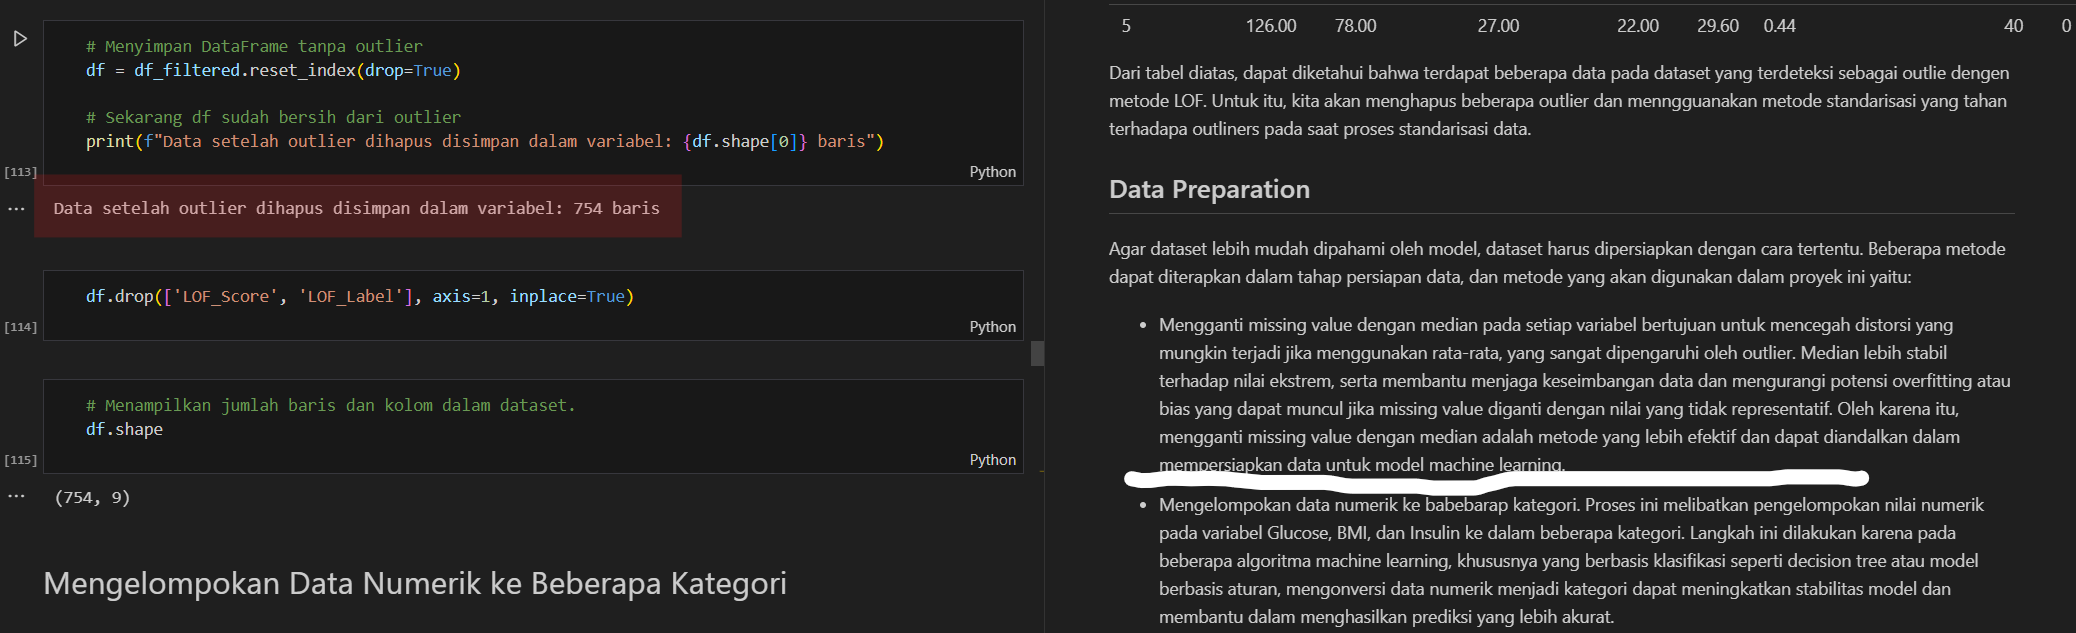
2. Struktur Laporan
* Gambar rumus F1-Score Belum dapat ditampikan karena menggunak url path repo bukan url raw
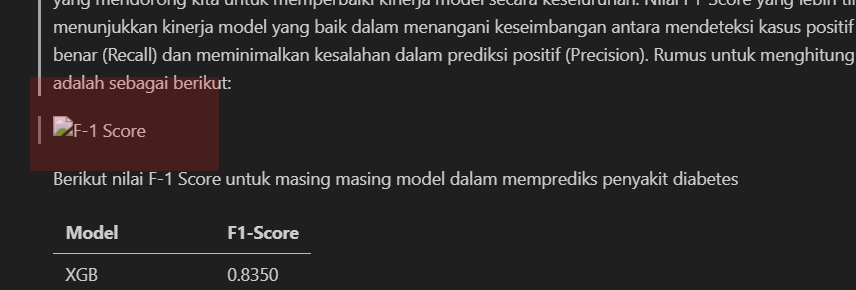
* Sturuktur Laporan tidak sesuai format seperti sub bab "Latar Belakang" diganti tulisannya menjadi "Domain Project"; tidak mencantupkan nama pada judul proyek; tidak membuat judul sub bagian "Problem Statement", "Goal", dan "Solution Statement" pada bagain sub bab Business Understanding pada Laporan
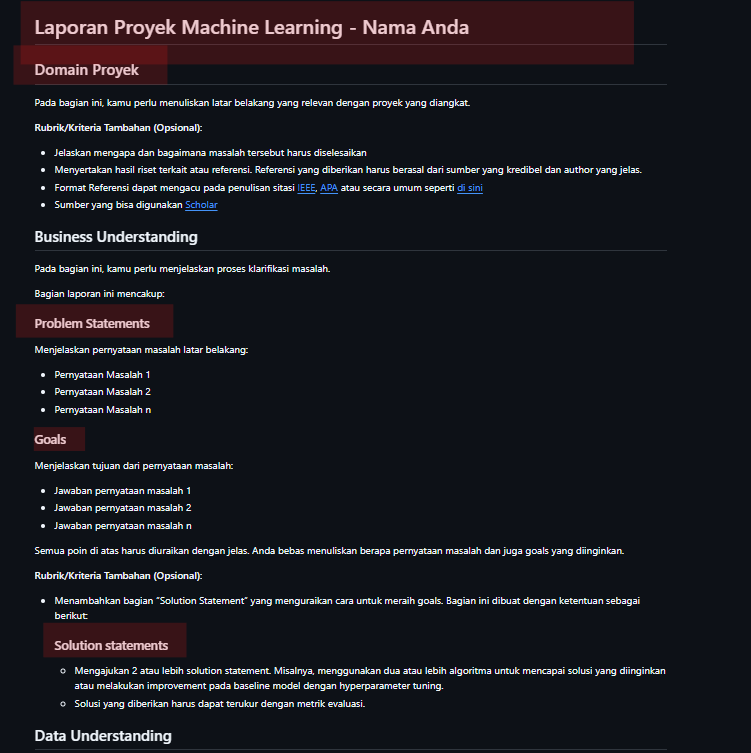

# Catatan Reviewe Ke-2 Sebelumya

1. Laporan pada bagian evaluasi belum :
 * menjelaskan metrik evaluasi yang dipilih dan alasan relevansinya terhadap proyek.
 * Tampilkan hasil pengukuran metrik tersebut untuk setiap model; apabila ada lebih dari satu, bandingkan performanya dan tentukan model unggulan.
 * Sertakan nilai numerik untuk masing-masing metrik sesuai yang digunakan
 * Selanjutnya, hubungkan temuan evaluasi ini dengan aspek Business Understanding:
    * Jelaskan bagaimana hasil model menjawab setiap problem statement.
    * Uraikan seberapa baik tujuan proyek tercapai berdasarkan metrik yang diperoleh.
    * Tunjukkan dampak setiap solusi yang diimplementasikan terhadap konteks bisnis.